<a href="https://colab.research.google.com/github/chandrakanta-chaudhury/Campaign-analysis/blob/master/pytorch_gpu_CIFAR1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib.pyplot as plt
import numpy as np
import torch

In [0]:
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.optim as optim


In [0]:
device=torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [4]:
print(device)

cuda:0


In [0]:
transform_train=transforms.Compose([transforms.RandomResizedCrop(224),transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),])

In [0]:
transform_test=transforms.Compose([transforms.RandomResizedCrop(224),transforms.ToTensor(),transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),])

In [9]:
trainset=torchvision.datasets.CIFAR10(root='/home/chandrakanta/Downloads',train=True,download=True,transform=transform_train)

Files already downloaded and verified


In [34]:
testset=torchvision.datasets.CIFAR10(root='/home/chandrakanta/Downloads',train=False,download=True,transform=transform_test)

Files already downloaded and verified


In [0]:
num_classes=10
batch_size=4


In [0]:
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)


In [0]:
dataiter=iter(trainloader)
images,labels=dataiter.next()


In [13]:
print(images.shape)

torch.Size([4, 3, 224, 224])


In [14]:
print(images[1].shape)
print(labels[1].item())

torch.Size([3, 224, 224])
4


In [0]:
def imshow(img,title):
  npimg=img.numpy()/2 + 0.5 
  plt.figure(figsize=(batch_size,1))
  plt.axis('off')
  plt.imshow(np.transpose(npimg,(1,2,0)))
  plt.title(title)
  plt.show()

In [0]:
def show_batch_images(dataloader):
  images,labels =next(iter(dataloader))
  img=torchvision.utils.make_grid(images)
  imshow(img,title=[str(x.item()) for x in labels])
  

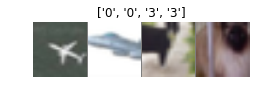

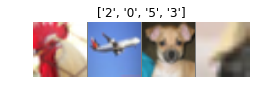

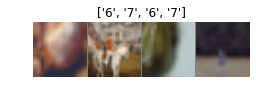

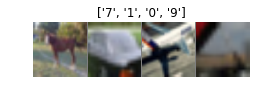

In [17]:
for i in range(4):
  show_batch_images(trainloader)

In [0]:
#Creating VGG-16

In [0]:
from torchvision import models

In [0]:
vgg=models.vgg16_bn()

In [25]:
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3)

In [26]:
print(vgg.features[0])


Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))


In [27]:
print(vgg.classifier[6])

Linear(in_features=4096, out_features=1000, bias=True)


In [20]:
final_in_features=vgg.classifier[6].in_features
mod_classifier=list(vgg.classifier.children())[:-1]
mod_classifier.extend([nn.Linear(final_in_features,num_classes)])
print(mod_classifier)

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace), Dropout(p=0.5), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace), Dropout(p=0.5), Linear(in_features=4096, out_features=10, bias=True)]


In [31]:
vgg.classifier=nn.Sequential(*mod_classifier)
print(vgg)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3)

In [0]:
#train 

In [0]:
batch_size=16
trainloader=torch.utils.data.DataLoader(trainset,batch_size=batch_size,shuffle=True)
testloader=torch.utils.data.DataLoader(testset,batch_size=batch_size,shuffle=False)

In [0]:
def evaluation(dataloader,model):
  total,correct=0,0
  for data in dataloader:
    inputs,labels=data
    inputs,labels=inputs.to(device),labels.to(device)
    outputs=model(inputs)
    _,pred=torch.max(outputs.data,1)
    total+=labels.size(0)
    correct+=(pred==labels).sum().item()
  return  100 * correct /total


In [0]:
vgg=vgg.to(device)
loss_fn=nn.CrossEntropyLoss()
opt=optim.SGD(vgg.parameters(),lr=0.005)


In [37]:
loss_epoch_arr=[]
max_epochs=1
n_iters=np.ceil(50000/batch_size)
for epoch in range(max_epochs):
  for i ,data in enumerate(trainloader,0):
    inputs,labels=data
    inputs,labels=inputs.to(device),labels.to(device)
    opt.zero_grad()
    outputs=vgg(inputs)
    loss=loss_fn(outputs,labels)
    loss.backward()
    opt.step()
    del inputs,outputs,labels
    torch.cuda.empty_cache()
    if i % 100 ==0 :
      print('iteration: %d/%d,loss: % 0.2f' %(i,n_iters,loss.item()))
    loss_epoch_arr.append(loss.item())
    print('epoch: %d/%d,test acc: %0.2f,train acc :%0.2f' %(epoch,max_epochs,
                                                           evaluation(testloader,vgg),evaluation(trainloader,vgg)))
plt.plot(loss_epoch_arr)
plt.show()
    

iteration: 0/3125,loss:  2.54
epoch: 0/1,test acc: 10.00,train acc :10.00
epoch: 0/1,test acc: 10.01,train acc :10.00
epoch: 0/1,test acc: 9.99,train acc :10.02
epoch: 0/1,test acc: 10.00,train acc :10.00
epoch: 0/1,test acc: 10.56,train acc :10.60
epoch: 0/1,test acc: 10.00,train acc :10.00


KeyboardInterrupt: ignored

In [0]:
#above takes lot of time , 
#freeze layer of convolutional operations
#use pretrained model 

In [0]:
vgg=models.vgg16_bn(pretrained=True)

In [25]:
#get last layer features
final_in_features=vgg.classifier[6].in_features
mod_classifier=list(vgg.classifier.children())[:-1]
mod_classifier.extend([nn.Linear(final_in_features,num_classes)])
print(mod_classifier)

[Linear(in_features=25088, out_features=4096, bias=True), ReLU(inplace), Dropout(p=0.5), Linear(in_features=4096, out_features=4096, bias=True), ReLU(inplace), Dropout(p=0.5), Linear(in_features=4096, out_features=10, bias=True)]


In [26]:
vgg.classifier=nn.Sequential(*mod_classifier)
print(vgg)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256, kernel_size=(3, 3)

In [0]:
for param in vgg.parameters():
  param.requires_grad=False

In [0]:
#channging final layer in another way
final_in_features=vgg.classifier[6].in_features
vgg.classifier[6]=nn.Linear(final_in_features,num_classes)


In [0]:
vgg=vgg.to(device)
loss_fn=nn.CrossEntropyLoss()
opt=optim.SGD(vgg.parameters(),lr=0.05)


In [30]:
for param in vgg.parameters():
  if param.requires_grad:
    print(param.shape)



torch.Size([10, 4096])
torch.Size([10])


In [0]:
loss_epoch_arr=[]
max_epochs=1
n_iters=np.ceil(50000/batch_size)
for epoch in range(max_epochs):
  for i ,data in enumerate(trainloader,0):
    inputs,labels=data
    inputs,labels=inputs.to(device),labels.to(device)
    opt.zero_grad()
    outputs=vgg(inputs)
    loss=loss_fn(outputs,labels)
    loss.backward()
    opt.step()
    del inputs,outputs,labels
    torch.cuda.empty_cache()
    if i % 100 ==0 :
      print('iteration: %d/%d,loss: % 0.2f' %(i,n_iters,loss.item()))
    loss_epoch_arr.append(loss.item())
    print('epoch: %d/%d,test acc: %0.2f,train acc :%0.2f' %(epoch,max_epochs,
                                                           evaluation(testloader,vgg),evaluation(trainloader,vgg)))
plt.plot(loss_epoch_arr)
plt.show()

iteration: 0/3125,loss:  2.41
epoch: 0/1,test acc: 15.42,train acc :15.43
epoch: 0/1,test acc: 17.34,train acc :17.67


KeyboardInterrupt: ignored

min loss 2.32
min loss 2.19
min loss 1.73
min loss 1.48
min loss 1.35
min loss 1.22
min loss 1.01
min loss 0.59
min loss 0.51


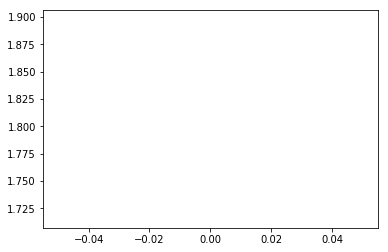

In [31]:
#with model copy 
#checkpoint where loss is optimal
import numpy as np
import copy
loss_epoch_arr=[]
max_epochs=1
min_loss=1000
n_iters=np.ceil(50000/batch_size)
for epoch in range(max_epochs):
  for i ,data in enumerate(trainloader,0):
    inputs,labels=data
    inputs,labels=inputs.to(device),labels.to(device)
    opt.zero_grad()
    outputs=vgg(inputs)
    loss=loss_fn(outputs,labels)
    loss.backward()
    opt.step()
    if min_loss > loss.item():
      min_loss=loss.item()
      best_model=copy.deepcopy(vgg.state_dict())
      print('min loss %0.2f' % min_loss)
    if 1 % 100 == 0:
      print('iteration: %d/%d,loss: %0.2f' %(i,n_iters,loss.item()))
    del inputs,outputs,labels
    torch.cuda.empty_cache()
  loss_epoch_arr.append(loss.item())  
plt.plot(loss_epoch_arr)
plt.show()

In [36]:
vgg.load_state_dict(best_model)
print(evaluation(trainloader,vgg),evaluation(testloader,vgg))

43.36 43.08
